In [1]:
%run -m celldom.nb.logging

In [2]:
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
from celldom.extract import NO_IMAGES, ALL_IMAGES, APT_IMAGES
import celldom
plt.gray()
None

In [5]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'experiment_example_G3'))

In [6]:
config.field_names

['datetime',
 'apartment',
 'hours',
 'street',
 'condition',
 'cohort',
 'color',
 'pump']

In [7]:
config.path_regex

'.*/.*(?P<pump>Elveflow|gravity)/.*/.* (?P<color>Orange|Red|White|Pink|Green|Blue|Yellow) (?P<condition>1|3) (?P<cohort>Control|[0-9\\.]{1,}uM) (?P<hours>[0-9]{1,3}) hr/BFF_16X_St_(?P<street>[0-9]{3})_Apt_(?P<apartment>[0-9]{3})_(?P<datetime>[0-9]{12}).tif'

In [8]:
config.parse_path('/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 0 hr/BFF_16X_St_003_Apt_010_201806150024.tif')

{'apartment': '010',
 'cohort': 'Control',
 'color': 'White',
 'condition': '3',
 'datetime': Timestamp('2018-06-15 00:24:00'),
 'hours': '0',
 'pump': 'gravity',
 'street': '003'}

In [9]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [10]:
output_dir = '/tmp/test'
if osp.exists(output_dir):
    !rm -rf /tmp/test/*
cytometer = cytometry.Cytometer(config, output_dir)

2018-09-12 18:09:27,525:INFO:celldom.io: Downloading model file from "https://storage.googleapis.com/celldom/models/r0.6/single_digit_model.h5" to /lab/data/celldom/.celldom/cache/models/single_digit_model.h5; this may take a while as these files are often large ...
2018-09-12 18:09:28,644:INFO:celldom.io: Download complete
2018-09-12 18:09:28,645:INFO:celldom.io: Downloading model file from "https://storage.googleapis.com/celldom/models/r0.6/marker_model.h5" to /lab/data/celldom/.celldom/cache/models/marker_model.h5; this may take a while as these files are often large ...
2018-09-12 18:09:44,960:INFO:celldom.io: Download complete


In [11]:
cytometer.initialize()

Using TensorFlow backend.


In [12]:
exp_dir = '_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 43 hr'
path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset05', exp_dir)
path

'/lab/data/celldom/dataset/dataset05/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 43 hr'

In [13]:
!ls "$path" | head -n 10

2018.06.14 White 3 Control 43 hr.txt
BFF_16X_St_000_Apt_000_201806161824.tif
BFF_16X_St_000_Apt_002_201806161824.tif
BFF_16X_St_000_Apt_004_201806161824.tif
BFF_16X_St_000_Apt_006_201806161824.tif
BFF_16X_St_000_Apt_008_201806161824.tif
BFF_16X_St_000_Apt_010_201806161824.tif
BFF_16X_St_000_Apt_012_201806161824.tif
BFF_16X_St_000_Apt_014_201806161824.tif
BFF_16X_St_000_Apt_016_201806161824.tif


In [32]:
#img_path = osp.join(path, 'BFF_16X_St_000_Apt_012_201806161824.tif')
img_path = osp.join(path, 'BFF_16X_St_000_Apt_010_201806161824.tif')
img_path

'/lab/data/celldom/dataset/dataset05/_2018.06.14 EXP SUM Control 0.1uM with 5mL gravity/2018.06.14 White 3 Control/2018.06.14 White 3 Control 43 hr/BFF_16X_St_000_Apt_010_201806161824.tif'

In [33]:
img_raw = io.imread(img_path)
img_raw.dtype, img_raw.shape

(dtype('uint8'), (1200, 1600))

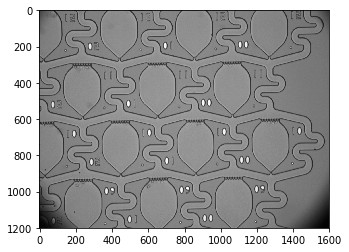

In [34]:
plt.imshow(img_raw)

In [35]:
acq = cytometry.Acquisition(config, img_path)

In [36]:
img = acq.load_image()
img.dtype, img.shape

(dtype('uint8'), (750, 1000, 3))

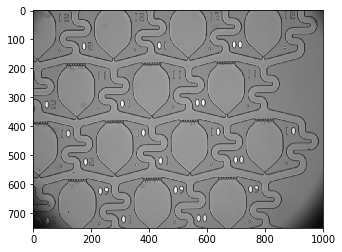

In [37]:
plt.imshow(img)

In [38]:
#cytometer.marker_model.config.display()

In [39]:
%%time
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=NO_IMAGES)
#acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=ALL_IMAGES)
acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=APT_IMAGES)

CPU times: user 2.24 s, sys: 2.53 s, total: 4.77 s
Wall time: 1.68 s


In [40]:
cytometer.save(acq_data, apt_data, cell_data)

In [41]:
cytometer.datastore.store.flush()
cytometer.images.store.flush()

In [42]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
acq_apartment             1 non-null object
acq_cohort                1 non-null object
acq_color                 1 non-null object
acq_condition             1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_hours                 1 non-null object
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_pump                  1 non-null object
acq_street                1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            0 non-null object
rotation                  1 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(10)
memory usage: 208.0+ bytes


In [43]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 41 columns):
acq_apartment             6 non-null object
acq_cohort                6 non-null object
acq_color                 6 non-null object
acq_condition             6 non-null object
acq_datetime              6 non-null datetime64[ns]
acq_hours                 6 non-null object
acq_id                    6 non-null object
acq_processed_at          6 non-null datetime64[ns]
acq_pump                  6 non-null object
acq_street                6 non-null object
apt_id                    6 non-null int64
apt_image                 6 non-null object
apt_image_height          6 non-null int64
apt_image_width           6 non-null int64
apt_num                   6 non-null object
apt_num_digit_images      0 non-null object
apt_num_digit_scores      6 non-null object
apt_num_image             0 non-null object
cell_area_mean            5 non-null float64
cell_area_p10             5 non-null float64
cell

In [44]:
acq_data.rotation

0   -0.667493
Name: rotation, dtype: float64

In [45]:
#plt.imshow(acq_data.raw_norm_image.iloc[0])

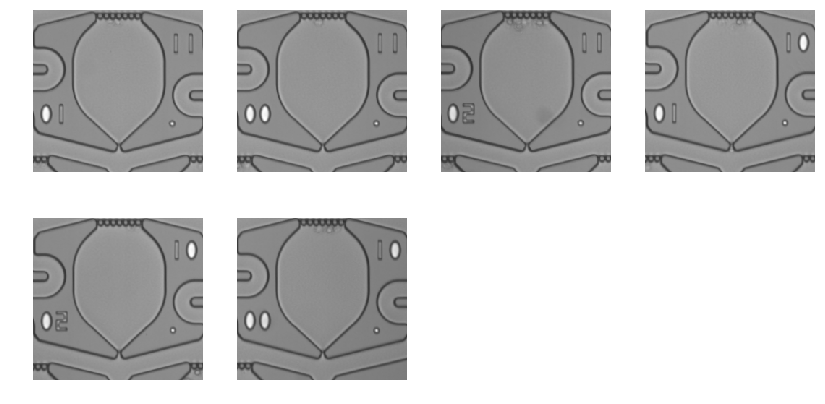

In [46]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'])

In [47]:
apt_data[['apt_num','st_num','cell_count']]

,apt_num,st_num,cell_count
0,11,01,2
1,11,00,1
2,11,02,6
3,10,01,3
4,10,02,0
5,10,00,4


In [30]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 2
Data columns (total 27 columns):
acq_apartment       17 non-null object
acq_cohort          17 non-null object
acq_color           17 non-null object
acq_condition       17 non-null object
acq_datetime        17 non-null datetime64[ns]
acq_hours           17 non-null object
acq_id              17 non-null object
acq_processed_at    17 non-null datetime64[ns]
acq_pump            17 non-null object
acq_street          17 non-null object
apt_id              17 non-null int64
apt_num             17 non-null object
area                17 non-null int64
cell_id             17 non-null int64
cell_image          0 non-null object
centroid_x          17 non-null float64
centroid_y          17 non-null float64
eccentricity        17 non-null float64
in_chamber          17 non-null bool
in_trap             17 non-null bool
roi_xmax            17 non-null int64
roi_xmin            17 non-null int64
roi_ymax            17 non-null

In [31]:
cell_data.groupby(['in_chamber', 'in_trap']).size()

in_chamber  in_trap
True        False      17
dtype: int64

#### Performance Profiling

In [ ]:
%load_ext line_profiler

In [51]:
from celldom.extract import apartment_extraction
from celldom.extract import cell_extraction
from celldom.extract import marker_extraction

In [52]:
%lprun -f cytometer.analyze -f apartment_extraction.extract -f marker_extraction.extract -f cell_extraction.extract cytometer.analyze(acq, dpf=NO_IMAGES)

Timer unit: 1e-06 s

Total time: 2.56635 s
File: /lab/repos/celldom/python/source/celldom/core/cytometry.py
Function: analyze at line 210

Line #      Hits         Time  Per Hit   % Time  Line Contents
   210                                               def analyze(self, acquisition, dpf=NO_IMAGES):
   211                                                   """Run cytometry analysis on a single acquisition
   212                                           
   213                                                   Args:
   214                                                       acquisition: Acquisition object
   215                                                       dpf: "Data Persistence Flags" indicating how more expensive objects like images are handled; see
   216                                                           celldom.extract for preset groupings of flags that can be used here -- for example:
   217                                                           ```
   218   